In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('pakwheels.csv');
df




,Unnamed: 0,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,"Oct 09, 2022",AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...
3,3,https://www.pakwheels.com/used-cars/toyota-for...,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,PKR 70 lacs,"94,000 km",Petrol,Automatic,Lahore,Black,Imported Cars,2700 cc,SUV,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,Inside out fully original. Original return fil...
4,4,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,PKR 8 lacs,"86,000 km",Petrol,Manual,Multan,Grey,Imported Cars,796 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,gari total genion hy.chill a.c.new tires.no wo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89951,89951,https://www.pakwheels.com/used-cars/daihatsu-m...,Daihatsu Mira G SA III 2018,"Gulshan-e-Iqbal, Karachi Sindh",2018.0,PKR 30 lacs,"65,000 km",Petrol,Automatic,Sindh,White,Imported,660 cc,Hatchback,"Aug 26, 2022",ABS\nAir Bags\nAir Conditioning\nAlloy Rims\nI...,100% original. Alloy Rims. Authorized dealersh...
89952,89952,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic Oriel 1.8 i-VTEC CVT 2017,"Tandlianwala Town, Faisalabad Punjab",2017.0,PKR 37.5 lacs,"114,000 km",Petrol,Automatic,Islamabad,Silver,Imported Cars,1800 cc,Sedan,"Aug 31, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,only call\nMention PakWheels.com when calling ...
89953,89953,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota Corolla GLi Automatic 1.6 VVTi 2011,Lahore Punjab,2011.0,PKR 22.35 lacs,"152,000 km",Petrol,Automatic,Lahore,Silver,Imported Cars,1600 cc,Sedan,"Aug 31, 2022",ABS\nAM/FM Radio\nAir Conditioning\nCD Player\...,After Market Alloy rims. All original document...
89954,89954,https://www.pakwheels.com/used-cars/suzuki-swi...,Suzuki Swift DLX 1.3 2013,"Gulshan-e-Iqbal, Karachi Sindh",2013.0,PKR 15.5 lacs,"104,000 km",Petrol,Manual,Karachi,Silver,Imported Cars,1300 cc,Hatchback,"Aug 31, 2022",ABS\nAM/FM Radio\nAir Conditioning\nAlloy Rims...,sides shower chat diggi bonet original car on ...


In [3]:
# A Part 
df_clean = df.copy()

# Drop irrelevant columns
drop_cols = ['Unnamed: 0', 'ad_url', 'description', 'car_features', 'ad_last_updated']
df_clean = df_clean.drop(columns=[c for c in drop_cols if c in df_clean.columns], errors='ignore')

# Convert price function
def convert_price(price):
    if pd.isna(price):
        return np.nan

    price = str(price).lower()
    price = price.replace("pkr", "").replace("rs", "").replace(",", "").strip()

    try:
        if "crore" in price:
            num = float(price.replace("crore", "").strip())
            return num * 10000000
        elif "lakh" in price or "lacs" in price or "lac" in price:
            for unit in ["lakh", "lacs", "lac"]:
                if unit in price:
                    num = float(price.replace(unit, "").strip())
                    return num * 100000
        elif "thousand" in price:
            num = float(price.replace("thousand", "").strip())
            return num * 1000
        else:
            return float(price)
    except:
        return np.nan

# Apply function to the DataFrame
df_clean["price"] = df_clean["price"].apply(convert_price)

# -----------------------------------------
# 3. MILEAGE CLEANING
# -----------------------------------------
def convert_mileage(m):
    try:
        m = str(m).lower()
        m = m.replace("km", "").replace(",", "").strip()
        return float(m)
    except:
        return np.nan

df_clean["mileage"] = df_clean["mileage"].apply(convert_mileage)


# -----------------------------------------
# 4. ENGINE CC CLEANING
# -----------------------------------------
def convert_engine(e):
    try:
        e = str(e).lower()
        e = e.replace("cc", "").replace(",", "").strip()
        return float(e)
    except:
        return np.nan

df_clean["engine_capacity"] = df_clean["engine_capacity"].apply(convert_engine)


# -----------------------------------------
# 5. MODEL YEAR CLEANING
# -----------------------------------------
df_clean["model_year"] = pd.to_numeric(df_clean["model_year"], errors="coerce")


# -----------------------------------------
# 6. BRAND EXTRACTION (first word of title)
# -----------------------------------------
df_clean["brand"] = df_clean["title"].astype(str).str.split().str[0]


# Show first rows

df_clean



,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,brand
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,1650000.0,100000.0,Petrol,Automatic,Lahore,Grey,Imported Cars,1800.0,Sedan,Honda
1,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,700000.0,100000.0,Petrol,Manual,Faisalabad,Grey,Imported Cars,800.0,Hatchback,Suzuki
2,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,760000.0,999.0,Petrol,Manual,Lahore,Black,Imported Cars,1500.0,Sedan,Honda
3,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,7000000.0,94000.0,Petrol,Automatic,Lahore,Black,Imported Cars,2700.0,SUV,Toyota
4,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,800000.0,86000.0,Petrol,Manual,Multan,Grey,Imported Cars,796.0,Hatchback,Suzuki
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89951,Daihatsu Mira G SA III 2018,"Gulshan-e-Iqbal, Karachi Sindh",2018.0,3000000.0,65000.0,Petrol,Automatic,Sindh,White,Imported,660.0,Hatchback,Daihatsu
89952,Honda Civic Oriel 1.8 i-VTEC CVT 2017,"Tandlianwala Town, Faisalabad Punjab",2017.0,3750000.0,114000.0,Petrol,Automatic,Islamabad,Silver,Imported Cars,1800.0,Sedan,Honda
89953,Toyota Corolla GLi Automatic 1.6 VVTi 2011,Lahore Punjab,2011.0,2235000.0,152000.0,Petrol,Automatic,Lahore,Silver,Imported Cars,1600.0,Sedan,Toyota
89954,Suzuki Swift DLX 1.3 2013,"Gulshan-e-Iqbal, Karachi Sindh",2013.0,1550000.0,104000.0,Petrol,Manual,Karachi,Silver,Imported Cars,1300.0,Hatchback,Suzuki


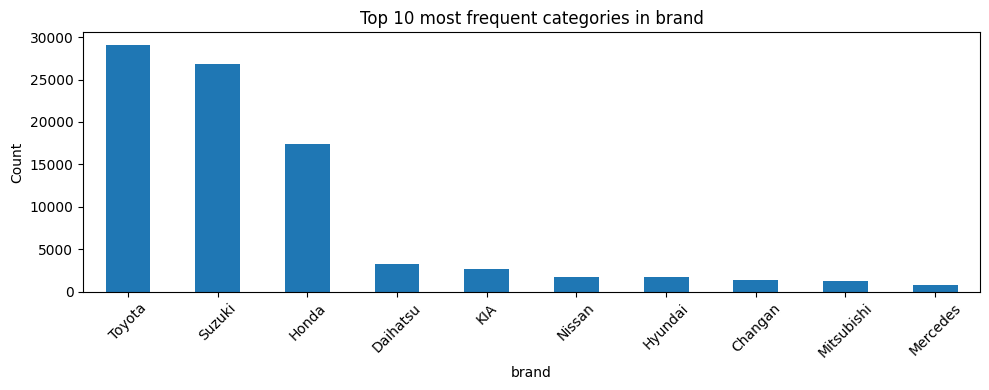

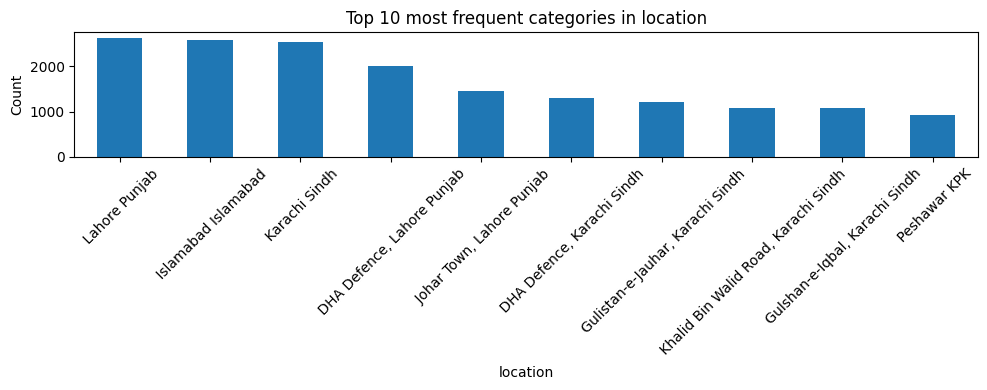

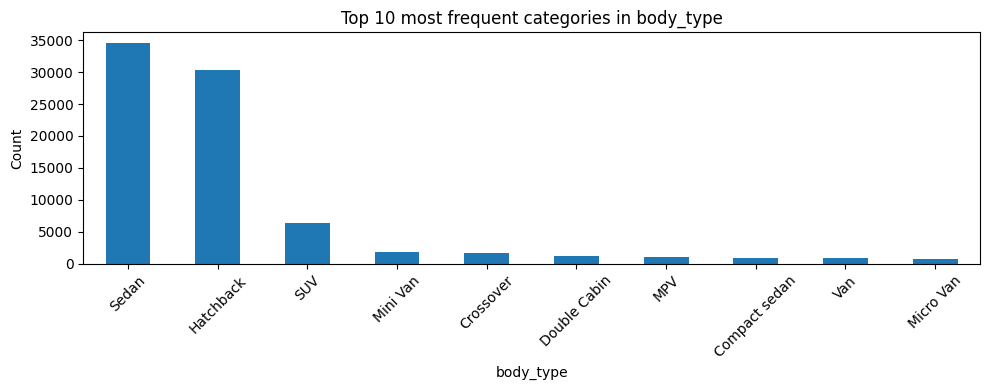

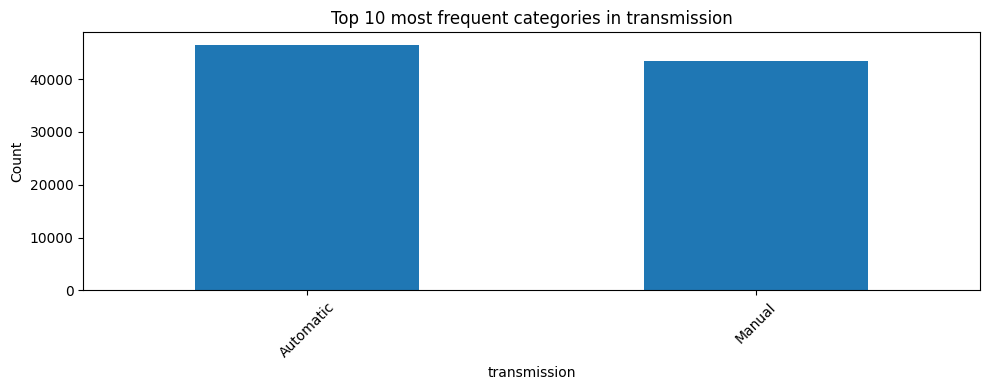

In [4]:
# Explanation:
# Bar charts are the most appropriate for categorical variables
# because they show how many times each category appears.

categorical_cols = ['brand', 'location', 'body_type', 'transmission']

for col in categorical_cols:
    if col in df_clean.columns:
        plt.figure(figsize=(10,4))
        df_clean[col].value_counts().head(10).plot(kind='bar')
        plt.title(f"Top 10 most frequent categories in {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [5]:
# Explanation:
# Compute basic descriptive statistics for numeric columns.
# These help understand the distribution before visualization.

numeric_cols = ['price', 'mileage', 'engine_capacity', 'model_year']

summary = df_clean[numeric_cols].describe().T
summary['skewness'] = df_clean[numeric_cols].skew()

summary


,count,mean,std,min,25%,50%,75%,max,skewness
price,88549.0,3.045594e+06,4.049545e+06,82000.0,1180000.0,2150000.0,3590000.0,115000000.0,8.616102
mileage,89954.0,8.427162e+04,9.045766e+04,1.0,20000.0,74000.0,120000.0,1000000.0,3.993613
engine_capacity,89820.0,1.406176e+03,7.370085e+02,100.0,1000.0,1300.0,1600.0,15000.0,4.589304
model_year,87449.0,2.012862e+03,7.669485e+00,1990.0,2007.0,2015.0,2019.0,2022.0,-0.775857


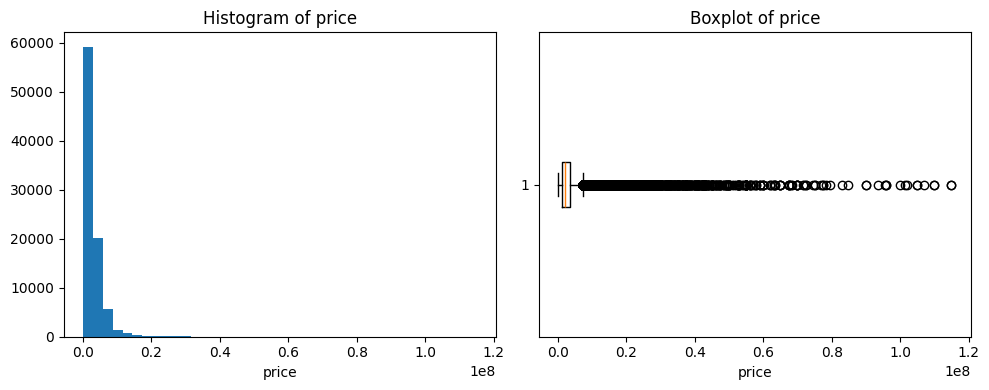

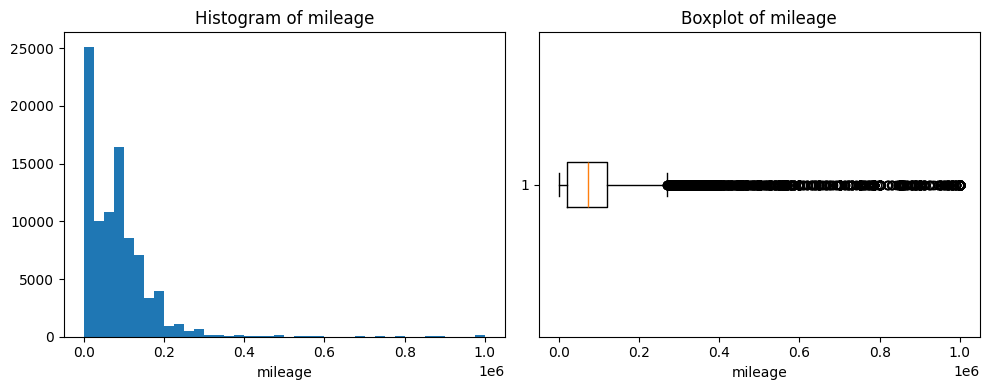

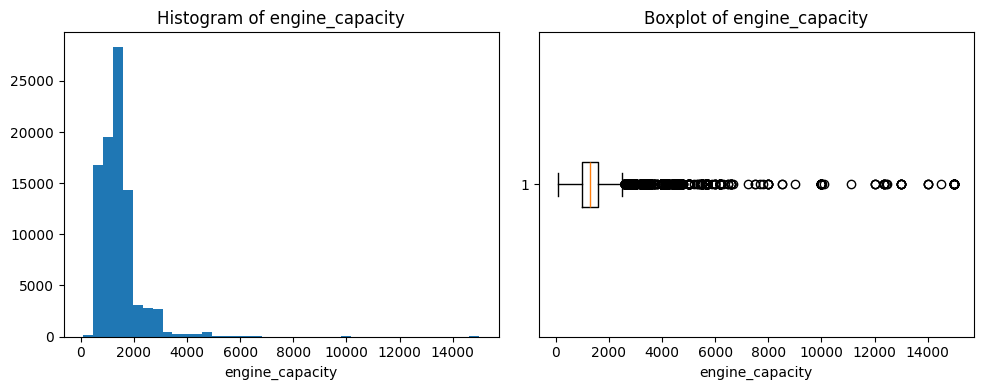

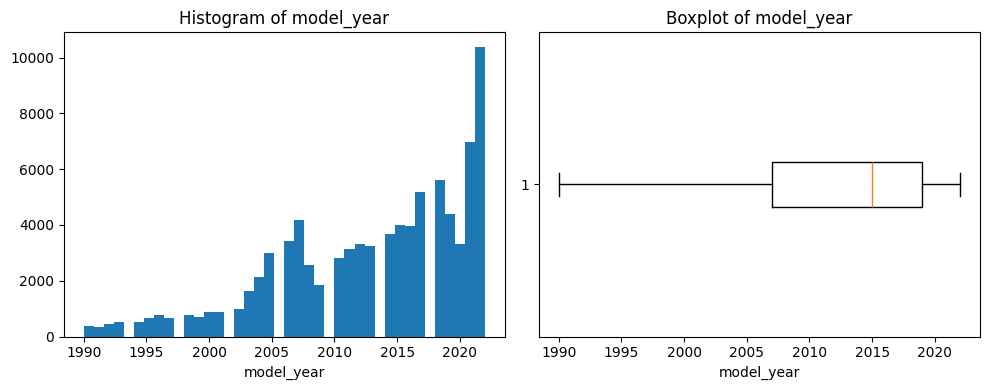

In [7]:
# Explanation:
# - Histogram shows distribution shape (normal, skewed, etc.)
# - Boxplot highlights outliers clearly

for col in numeric_cols:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1,2,1)
    plt.hist(df_clean[col].dropna(), bins=40)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1,2,2)
    plt.boxplot(df_clean[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


In [8]:
# Explanation:
# Here we simply PRINT interpretations based on statistics.
# You will copy these interpretations into your report.

for col in numeric_cols:
    skew = df_clean[col].skew()
    print(f"\n=== {col.upper()} ===")
    print(f"Skewness: {skew}")

    if skew > 1:
        print("→ Highly right-skewed. Log transformation might help.")
    elif skew > 0.5:
        print("→ Moderately right-skewed.")
    elif skew < -1:
        print("→ Highly left-skewed. Square transformation may help.")
    else:
        print("→ Approximately symmetric.")

    # Outlier detection using IQR
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)][col].count()

    print(f"Outliers detected: {outliers}")



=== PRICE ===
Skewness: 8.616101938998835
→ Highly right-skewed. Log transformation might help.
Outliers detected: 5388

=== MILEAGE ===
Skewness: 3.9936134512610786
→ Highly right-skewed. Log transformation might help.
Outliers detected: 2098

=== ENGINE_CAPACITY ===
Skewness: 4.58930416796377
→ Highly right-skewed. Log transformation might help.
Outliers detected: 6203

=== MODEL_YEAR ===
Skewness: -0.7758570663143334
→ Approximately symmetric.
Outliers detected: 0


In [9]:
#  B Part
from scipy import stats
import numpy as np

# Attribute of interest
data = df_clean['price'].dropna()

# Hypothesized mean
mu_0 = 2000000  # 2 million PKR

# Sample statistics
sample_mean = data.mean()
sample_std = data.std(ddof=1)
n = len(data)

# t-test statistic
t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Degrees of freedom
dfree = n - 1

# Two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=dfree))

# 95% Confidence Interval
ci_lower, ci_upper = stats.t.interval(0.95, df=dfree, loc=sample_mean, scale=sample_std/np.sqrt(n))

print(f"Sample mean: {sample_mean:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Interpretation
if p_value < 0.05:
    print("→ Reject the null hypothesis. The mean price is significantly different from 2,000,000 PKR.")
else:
    print("→ Fail to reject the null hypothesis. No evidence that the mean price differs from 2,000,000 PKR.")




Sample mean: 3045594.25
T-statistic: 76.8332
P-value: 0.0000
95% Confidence Interval: (3018921.46, 3072267.04)
→ Reject the null hypothesis. The mean price is significantly different from 2,000,000 PKR.


In [10]:
#Part C
# Split data into two groups
auto_prices = df_clean[df_clean['transmission'] == 'Automatic']['price'].dropna()
manual_prices = df_clean[df_clean['transmission'] == 'Manual']['price'].dropna()
from scipy import stats
import numpy as np

# Two-sample t-test (Welch's t-test)
t_stat, p_value = stats.ttest_ind(auto_prices, manual_prices, equal_var=False)

# Degrees of freedom (Welch-Satterthwaite approximation)
n1, n2 = len(auto_prices), len(manual_prices)
s1, s2 = auto_prices.std(ddof=1), manual_prices.std(ddof=1)
df = ((s1**2/n1 + s2**2/n2)**2) / ((s1**4)/((n1**2)*(n1-1)) + (s2**4)/((n2**2)*(n2-1)))

# 95% Confidence Interval for difference of means
diff_mean = auto_prices.mean() - manual_prices.mean()
se_diff = np.sqrt(s1**2/n1 + s2**2/n2)
ci_lower = diff_mean - stats.t.ppf(0.975, df) * se_diff
ci_upper = diff_mean + stats.t.ppf(0.975, df) * se_diff

# Critical value for alpha = 0.05
critical_value = stats.t.ppf(0.975, df)

print(f"Mean Difference: {diff_mean:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"95% CI for difference: ({ci_lower:.2f}, {ci_upper:.2f})")
print(f"Critical t-value (two-tailed, alpha=0.05): ±{critical_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("→ Reject the null hypothesis.")
else:
    print("→ Fail to reject the null hypothesis.")



Mean Difference: 3100686.10
T-statistic: 125.9136
P-value: 0.0000
95% CI for difference: (3052419.77, 3148952.42)
Critical t-value (two-tailed, alpha=0.05): ±1.9600
→ Reject the null hypothesis.


In [11]:
#Part D
import pandas as pd
from scipy.stats import shapiro, levene, f_oneway, kruskal
import numpy as np

# --- Prepare Data ---
df_clean['brand'] = df_clean['title'].astype(str).str.split().str[0]  # Extract brand
top_brands = df_clean['brand'].value_counts().head(5).index  # Pick top 5 brands
groups = [df_clean[df_clean['brand']==b]['price'].dropna() for b in top_brands]

# --- Assumption Checks ---
print("=== Normality Check (Shapiro-Wilk) ===")
for i, g in enumerate(groups):
    sample = g.sample(min(5000, len(g)), random_state=1)  # sample if too large
    stat, p = shapiro(sample)
    print(f"{top_brands[i]}: p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

stat, p_levene = levene(*groups)
print(f"\nLevene’s Test for equal variances: p={p_levene:.4f} -> {'Equal' if p_levene>0.05 else 'Unequal'}")

# --- Choose Test ---
if all(shapiro(g.sample(min(5000, len(g)), random_state=1))[1] > 0.05 for g in groups) and p_levene>0.05:
    # Assumptions satisfied -> One-way ANOVA
    f_stat, p_value = f_oneway(*groups)
    test_name = "ANOVA"
else:
    # Violated -> Kruskal-Wallis
    f_stat, p_value = kruskal(*groups)
    test_name = "Kruskal-Wallis"

# --- Results ---
print(f"\n{test_name} Test Statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

# --- Interpretation ---
alpha_levels = [0.05, 0.01]
for alpha in alpha_levels:
    if p_value < alpha:
        print(f"At α={alpha}: Reject H0 -> Price differs across groups")
    else:
        print(f"At α={alpha}: Fail to reject H0 -> No strong evidence price differs")


=== Normality Check (Shapiro-Wilk) ===
Toyota: p=0.0000 -> Not Normal
Suzuki: p=0.0000 -> Not Normal
Honda: p=0.0000 -> Not Normal
Daihatsu: p=0.0000 -> Not Normal
KIA: p=0.0000 -> Not Normal

Levene’s Test for equal variances: p=0.0000 -> Unequal

Kruskal-Wallis Test Statistic: 27127.5118, p-value: 0.0000
At α=0.05: Reject H0 -> Price differs across groups
At α=0.01: Reject H0 -> Price differs across groups


In [69]:
#Part E
#Observation:
#If p-value is between 0.01 and 0.05, the decision changes depending on α.
#If p-value < 0.01 → decision same (reject H0)
#If p-value > 0.05 → decision same (fail to reject H0)

In [14]:
from scipy.stats import pearsonr
import numpy as np

def corr_pval_ci(x, y, alpha=0.05):
    # Drop NaNs for this pair
    valid = x.notna() & y.notna()
    x_clean = x[valid]
    y_clean = y[valid]

    if len(x_clean) < 4:  # Pearson correlation not defined for very small samples
        return np.nan, np.nan, (np.nan, np.nan)
    
    # Pearson correlation and p-value
    r, p = pearsonr(x_clean, y_clean)
    
    # Fisher Z-transform for 95% CI
    n = len(x_clean)
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_crit = 1.96  # 95% CI
    lo = np.tanh(z - z_crit * se)
    hi = np.tanh(z + z_crit * se)
    
    return r, p, (lo, hi)


In [15]:
results = []
numeric_cols = ['price', 'mileage', 'engine_capacity', 'model_year']

for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        x = numeric_cols[i]
        y = numeric_cols[j]
        r, p, ci = corr_pval_ci(df_clean[x], df_clean[y])
        results.append({
            'Feature 1': x,
            'Feature 2': y,
            'Correlation': r,
            'p-value': p,
            '95% CI': ci
        })

df_corr_results = pd.DataFrame(results)
df_corr_results


,Feature 1,Feature 2,Correlation,p-value,95% CI
0,price,mileage,-0.193718,0.000000e+00,"(-0.20004953263470523, -0.18737054130159522)"
1,price,engine_capacity,0.520049,0.000000e+00,"(0.5152242815969776, 0.5248404127757565)"
2,price,model_year,0.322592,0.000000e+00,"(0.31659237469637536, 0.3285652964314723)"
3,mileage,engine_capacity,0.035078,7.282471e-26,"(0.028545124578159397, 0.041608815528534605)"
4,mileage,model_year,-0.462758,0.000000e+00,"(-0.4679506697908313, -0.45753334350940633)"
5,engine_capacity,model_year,-0.066490,3.995956e-86,"(-0.07309097252680537, -0.05988353495806574)"


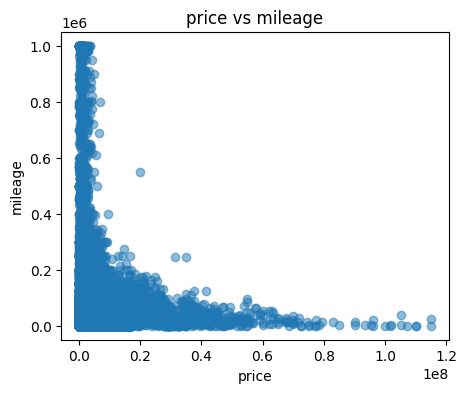

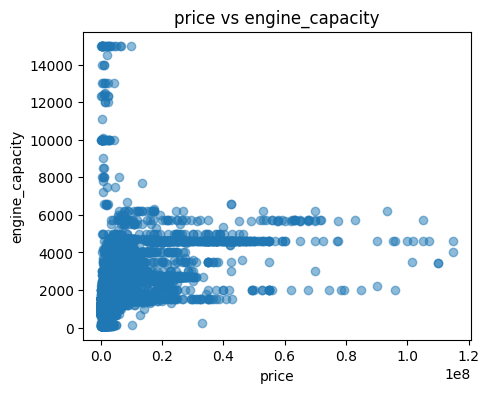

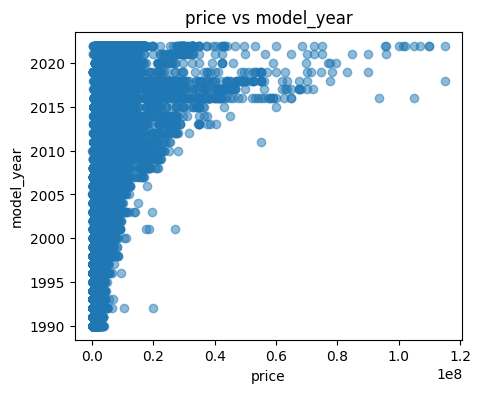

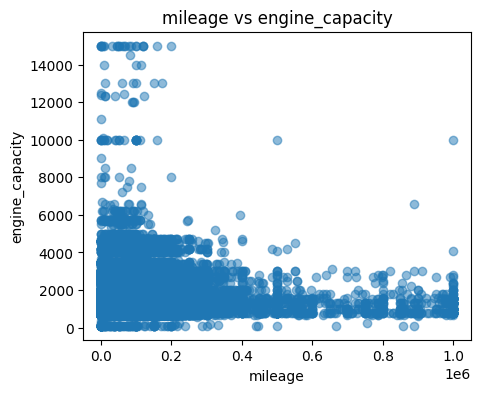

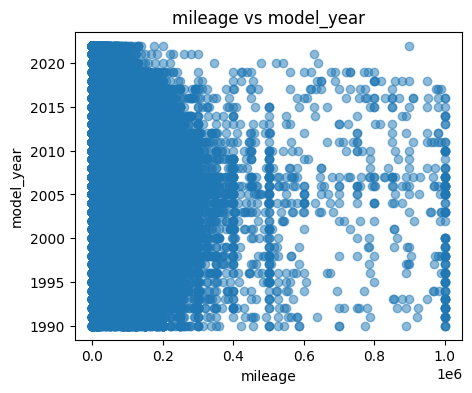

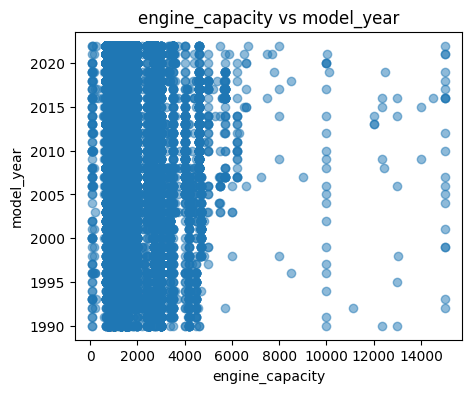

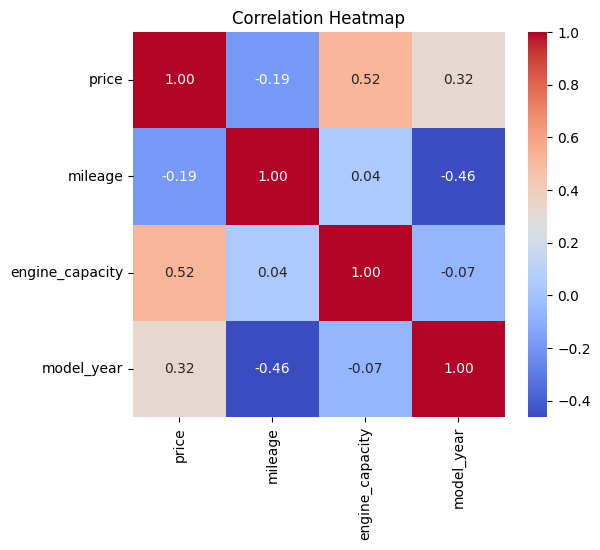

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        plt.figure(figsize=(5,4))
        plt.scatter(df_clean[numeric_cols[i]], df_clean[numeric_cols[j]], alpha=0.5)
        plt.xlabel(numeric_cols[i])
        plt.ylabel(numeric_cols[j])
        plt.title(f"{numeric_cols[i]} vs {numeric_cols[j]}")
        plt.show()

# Correlation heatmap
corr_matrix = df_clean[numeric_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [73]:
import numpy as np

# Example: one-sample test for Toyota prices
toyota_prices = df_clean[df_clean['brand']=='Toyota']['price'].dropna()
hypothesized_mean = 2000000  # 2 million PKR
n_iterations = 1000
boot_means = []

# Bootstrapping
for _ in range(n_iterations):
    sample = np.random.choice(toyota_prices, size=len(toyota_prices), replace=True)
    boot_means.append(np.mean(sample))

boot_means = np.array(boot_means)

# 95% confidence interval from bootstrap
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"Bootstrap 95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")

# Decision
if hypothesized_mean < ci_lower or hypothesized_mean > ci_upper:
    print("Reject H0 (mean differs from hypothesized value)")
else:
    print("Fail to reject H0 (no evidence mean differs)")


Bootstrap 95% CI: (4150961.07, 4267058.24)
Reject H0 (mean differs from hypothesized value)


(np.float64(-0.5), np.float64(599.5), np.float64(375.5), np.float64(-0.5))

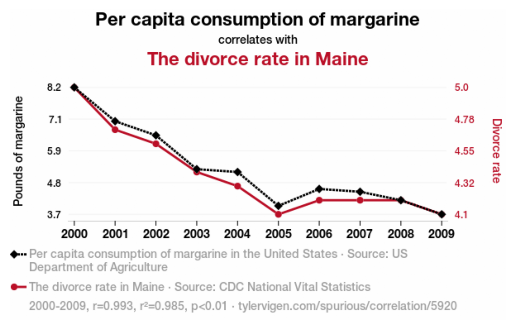

In [1]:
#Q2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('image.png')
plt.imshow(img)
plt.axis('off')


In [ ]:
# Correlation Chosen: “Margarine consumption per capita” vs. “Divorce rate in Maine.”

# Explanation:
# This correlation shows that when margarine consumption went up or down, the divorce rate in the state of Maine also changed in a very similar pattern.
# The graph looks like there is a strong relationship, but logically margarine has nothing to do with divorce. 
# If this correlation were true, it would mean something as simple as eating margarine could affect marriages,
# which would have a huge impact on society, food laws, and family life. 
# This example teaches us how misleading strong correlations can look even when they make no real-world sense.

In [ ]:
# Part B
# After exploring spurious correlations, I learned that two things can look strongly connected even when they have no real relationship.
#Such wrong correlations are very common, especially when datasets are large or when both variables just increase over time.
#We should not trust a correlation unless it also makes logical or scientific sense.
#To identify wrong correlations, we should check:
# Does the relationship make sense in real life?
# Is there a third variable causing both?
# Are both variables just increasing over time due to trend?
# Can the pattern be repeated on different datasets?
# In simple words: high correlation does NOT mean one thing causes the other, 
#and we must always check carefully before believing it.

  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   
3                 8.0                        1.0                       1.0   
4                 7.0                        5.0                       1.0   

  Social_Media_Platform  Happiness_Index(1-10)  
0              Facebook                   10.0  
1     

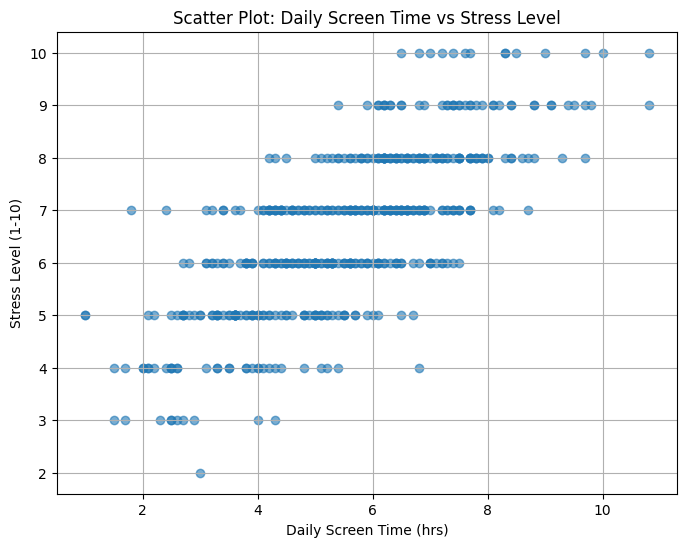

Correlation coefficient (r): 0.74
Correlation coefficient (r): 0.74
p-value: 0.00000
95% Confidence Interval for r: (0.70, 0.78)
Bootstrap 95% CI: (0.70, 0.78)


In [18]:
# PARt c
# Mental_Health_and_Social_Media_Balance_Dataset
# https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance
# Part (c), (d), (e) - Mental Health & Social Media Dataset

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# ----------------------------
# Step 1: Load Dataset
# ----------------------------
df = pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")

# Inspect first few rows
print(df.head())

# ----------------------------
# Part (c): Scatter Plot & Correlation
# ----------------------------
# Selected variables for spurious correlation:
x = df["Daily_Screen_Time(hrs)"]  # Independent variable
y = df["Stress_Level(1-10)"]      # Dependent variable

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Stress Level (1-10)")
plt.title("Scatter Plot: Daily Screen Time vs Stress Level")
plt.grid(True)
plt.show()

# Compute correlation coefficient
r, _ = pearsonr(x, y)
print(f"Correlation coefficient (r): {r:.2f}")

# ----------------------------
# Part (d): 95% Confidence Interval & p-value
# ----------------------------
r, p_value = pearsonr(x, y)
print(f"Correlation coefficient (r): {r:.2f}")
print(f"p-value: {p_value:.5f}")

# Fisher z-transformation for 95% CI
n = len(df)
z = np.arctanh(r)
se = 1 / np.sqrt(n - 3)
z_lower = z - 1.96*se
z_upper = z + 1.96*se
ci_lower = np.tanh(z_lower)
ci_upper = np.tanh(z_upper)
print(f"95% Confidence Interval for r: ({ci_lower:.2f}, {ci_upper:.2f})")

# ----------------------------
# Part (e): Bootstrapping 1000 iterations
# ----------------------------
r_bootstrap = []

for i in range(1000):
    sample = df.sample(frac=1, replace=True)
    r_sample, _ = pearsonr(sample["Daily_Screen_Time(hrs)"], sample["Stress_Level(1-10)"])
    r_bootstrap.append(r_sample)

# Bootstrap 95% CI
lower = np.percentile(r_bootstrap, 2.5)
upper = np.percentile(r_bootstrap, 97.5)
print(f"Bootstrap 95% CI: ({lower:.2f}, {upper:.2f})")


In [ ]:
# Daily screen time and stress show a strong correlation (r = 0.74), and this correlation is statistically significant and stable (95% CI = 0.70–0.78).
# However, this does not prove that screen time causes stress. 
# Hidden factors like sleep, exercise, or lifestyle could affect both variables, making this a potentially spurious correlation.